# Data Cleaning

## Read the Data Sets

Import initial libraries

In [51]:
#import pandas
import pandas as pd

#import os
import os

Initiate with relative paths

In [52]:
#Define directories
current_dir = os.getcwd()
project_dir = os.path.dirname(current_dir)
data_sets_dir = os.path.join(project_dir,'Data_Base', 'Data_Set_2023 - CIS 7031')
cleaned_data_sets_dir = os.path.join(project_dir,'Data_Base', 'Cleaned_Data_Set')

print (current_dir)
print (project_dir)
print (data_sets_dir)
print (cleaned_data_sets_dir)

c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Codes
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Data_Base\Data_Set_2023 - CIS 7031
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Data_Base\Cleaned_Data_Set


Read data from csv files to Python environment for processing

In [53]:
#Define the CSV files
employee_csv_file = 'Employee.csv'
fields_csv_file = 'Fields.csv'
workcode_csv_file = 'WorkCode.csv'
workdetails_csv_file = 'WorkDetails.csv'

#Define the relative path to the CSV files
employee_csv_path = os.path.join(data_sets_dir, employee_csv_file)
fields_csv_path = os.path.join(data_sets_dir, fields_csv_file)
workcode_csv_path = os.path.join(data_sets_dir, workcode_csv_file)
workdetails_csv_path = os.path.join(data_sets_dir, workdetails_csv_file)

In [54]:
#Read the CSV files
Employee_df = pd.read_csv(employee_csv_path)
Fields_df = pd.read_csv(fields_csv_path)
WorkCode_df = pd.read_csv(workcode_csv_path)
WorkDetails_df = pd.read_csv(workdetails_csv_path)

## Clean any outliers, exceptional values from the datasets

For Employee data set

In [55]:
Employee_df = pd.read_csv(employee_csv_path)

In [56]:
#Remove all duplicate rows in Employee data set
Employee_df = Employee_df.drop_duplicates()

In [57]:
Employee_df

,Estate,Division,EmpCode,Gender,DateofJoin,PAMACT
0,EST,HO,2727,F,1/1/1972,A
1,EST,HO,11211,M,2/27/1975,T
2,EST,HO,29593,F,11/9/1972,A
3,EST,HO,37774,F,5/2/1973,A
4,EST,HO,37875,F,5/2/1973,A
...,...,...,...,...,...,...
2010,EST,UD,6063939,M,NaN,T
2011,EST,UD,6064040,M,NaN,A
2012,EST,UD,6064141,M,NaN,A
2013,EST,UD,6064242,M,NaN,T


In [58]:
#Count No of unique values in each columns of Employee data set
Employee_df.nunique()

Estate           1
Division         5
EmpCode       1932
Gender           2
DateofJoin     733
PAMACT           4
dtype: int64

Latest Date of Join was selected as the Division for the Employee by assuming the last joined division is related for Work Details between 2012 to 2015

In [59]:
#Remove duplicates by EmpCode by keeping latest DateofJoin
Employee_df = Employee_df.sort_values('DateofJoin', ascending=False).drop_duplicates(['EmpCode'])
Employee_df

,Estate,Division,EmpCode,Gender,DateofJoin,PAMACT
1795,EST,UD,493082,F,9/9/1988,A
1917,EST,UD,570650,F,9/8/2003,A
1918,EST,UD,570751,M,9/8/2003,A
544,EST,LD,525806,F,9/6/1994,A
908,EST,MD,215736,F,9/6/1989,A
...,...,...,...,...,...,...
2010,EST,UD,6063939,M,NaN,T
2011,EST,UD,6064040,M,NaN,A
2012,EST,UD,6064141,M,NaN,A
2013,EST,UD,6064242,M,NaN,T


In [60]:
#Sort Employee data set by EmpCode
Employee_df = Employee_df.sort_values('EmpCode')
Employee_df

,Estate,Division,EmpCode,Gender,DateofJoin,PAMACT
193,EST,HO,101,M,1/1/1980,T
194,EST,HO,404,M,4/1/1986,A
428,EST,HO,1414,M,5/1/2003,A
195,EST,HO,1616,F,10/16/1970,A
0,EST,HO,2727,F,1/1/1972,A
...,...,...,...,...,...,...
2013,EST,UD,6064242,M,NaN,T
2014,EST,UD,6064848,M,NaN,A
953,EST,MD,6065151,F,2/11/1976,T
954,EST,MD,6065252,F,3/9/1978,A


In [61]:
#Count No of NaN values in each columns of Employee data set
Employee_df.isnull().sum()

Estate          0
Division        0
EmpCode         0
Gender          0
DateofJoin    161
PAMACT          6
dtype: int64

In [62]:
#Drop the DateofJoin column
Employee_df = Employee_df.drop(['DateofJoin'], axis=1)

#Drop the PAMACT column
Employee_df = Employee_df.drop(['PAMACT'], axis=1)

Employee_df.isnull().sum()

Estate      0
Division    0
EmpCode     0
Gender      0
dtype: int64

In [63]:
#Save the cleaned Employee data set to a new CSV file
Employee_df.to_csv(os.path.join(cleaned_data_sets_dir, 'Employee_Cleaned.csv'), index=False)

For Fields data set

In [64]:
Fields_df = pd.read_csv(fields_csv_path)

In [65]:
#Remove all duplicate rows in Fields data set
Fields_df = Fields_df.drop_duplicates()

#Sort the Fields data set ID column in ascending order
Fields_df = Fields_df.sort_values('ID', ascending=True)

In [66]:
Fields_df

,ID,EState,Division,CropType,Field,Area (Ha),NumberOfTree,Type
193,101,EST,HO,T,3A,3.3,48100,R
194,404,EST,HO,T,19,5.8,30015,R
428,1414,EST,HO,T,FW1,0.3,4500,C
195,1616,EST,HO,T,4B,2.5,14308,R
0,2727,EST,HO,T,6A,0.8,9302,R
...,...,...,...,...,...,...,...,...
1930,6064242,EST,UD,T,9,6.3,48919,R
1931,6064848,EST,UD,T,6B,0.8,9257,R
949,6065151,EST,MD,T,GM11,2.0,26000,C
950,6065252,EST,MD,T,GM12,3.0,26000,C


In [67]:
#Count No of unique values in each columns of Fields data set
Fields_df.nunique()

ID              1932
EState             1
Division           5
CropType           3
Field             63
Area (Ha)         18
NumberOfTree      34
Type               3
dtype: int64

In [68]:
#Count No of NaN values in each columns of Fields data set
Fields_df.isnull().sum()

ID              0
EState          0
Division        0
CropType        0
Field           0
Area (Ha)       0
NumberOfTree    0
Type            0
dtype: int64

In [69]:
#Check whether the EmpCode column in Employee data set and ID column in Fields data set have the same values
Employee_df['EmpCode'].isin(Fields_df['ID']).value_counts()

EmpCode
True    1932
Name: count, dtype: int64

In [70]:
#Rename the ID column in Fields data set to EmpCode
Fields_df = Fields_df.rename(columns={'ID': 'EmpCode'})
Fields_df

,EmpCode,EState,Division,CropType,Field,Area (Ha),NumberOfTree,Type
193,101,EST,HO,T,3A,3.3,48100,R
194,404,EST,HO,T,19,5.8,30015,R
428,1414,EST,HO,T,FW1,0.3,4500,C
195,1616,EST,HO,T,4B,2.5,14308,R
0,2727,EST,HO,T,6A,0.8,9302,R
...,...,...,...,...,...,...,...,...
1930,6064242,EST,UD,T,9,6.3,48919,R
1931,6064848,EST,UD,T,6B,0.8,9257,R
949,6065151,EST,MD,T,GM11,2.0,26000,C
950,6065252,EST,MD,T,GM12,3.0,26000,C


In [71]:
#Save the cleaned Fields data set to a new CSV file
Fields_df.to_csv(os.path.join(cleaned_data_sets_dir, 'Fields_Cleaned.csv'), index=False)

For Work Code data set

In [72]:
WorkCode_df = pd.read_csv(workcode_csv_path)

In [73]:
#Remove all duplicate rows in Work Code data set
WorkCode_df = WorkCode_df.drop_duplicates()

In [74]:
WorkCode_df

,WorCode,Crop,Type
0,CHC,T,R
1,TPR,T,R
2,MUS,T,R
3,WBN,T,R
4,EFD,T,R
...,...,...,...
478,FIG,T,C
479,FWW,T,O
480,ITP,T,R
481,RNO,T,O


In [75]:
#Count No of unique values in each columns of Work Code data set
WorkCode_df.nunique()

WorCode    481
Crop         1
Type         3
dtype: int64

In [76]:
#Count No of NaN values in each columns of Work Code data set
WorkCode_df.isnull().sum()

WorCode    0
Crop       0
Type       4
dtype: int64

In [77]:
#Remove Nan values from Work Code data set
WorkCode_df = WorkCode_df.dropna()
WorkCode_df

,WorCode,Crop,Type
0,CHC,T,R
1,TPR,T,R
2,MUS,T,R
3,WBN,T,R
4,EFD,T,R
...,...,...,...
478,FIG,T,C
479,FWW,T,O
480,ITP,T,R
481,RNO,T,O


In [78]:
#Save the cleaned Work Code data set to a new CSV file
WorkCode_df.to_csv(os.path.join(cleaned_data_sets_dir, 'WorkCode_Cleaned.csv'), index=False)

For Work Details data set

In [79]:
WorkDetails_df = pd.read_csv(workdetails_csv_path)

In [80]:
#Remove all duplicate rows in Work Details data set
WorkDetails_df = WorkDetails_df.drop_duplicates()

In [81]:
WorkDetails_df

,Year,Month,Day,Estate,Division,EmpCode,Work,Workdayfraction,Qty,ExtraKilos
0,2012,6,20,EST,HO,41107,ABS,1.0,22.0,0.0
1,2012,7,9,EST,HO,41309,PLK,1.0,22.0,0.0
2,2012,9,27,EST,HO,41309,PLK,1.0,22.0,0.0
3,2014,1,10,EST,HO,41309,PLK,1.0,22.0,0.0
4,2013,2,25,EST,HO,41309,PLK,1.5,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1048570,2012,6,29,EST,UD,6065353,XXX,1.0,NaN,NaN
1048571,2012,3,31,EST,UD,6065353,XXX,1.0,NaN,NaN
1048572,2015,8,13,EST,UD,6065353,XXX,1.0,NaN,NaN
1048573,2015,8,14,EST,UD,6065353,XXX,1.0,NaN,NaN


In [82]:
#Column names of Work Details data set
WorkDetails_df.columns

Index(['Year', 'Month', 'Day', 'Estate', 'Division', 'EmpCode', 'Work',
       'Workdayfraction', 'Qty', 'ExtraKilos'],
      dtype='object')

In [83]:
#Count No of unique values in each columns of Work Details data set
WorkDetails_df.nunique()

Year                  4
Month                12
Day                  31
Estate                1
Division              5
EmpCode            1561
Work                137
Workdayfraction       4
Qty                2411
ExtraKilos          428
dtype: int64

In [84]:
#Count No of NaN values in each columns of Work Details data set
WorkDetails_df.isnull().sum()

Year                    0
Month                   0
Day                     0
Estate                  0
Division                0
EmpCode                 0
Work                    0
Workdayfraction         0
Qty                141027
ExtraKilos          98824
dtype: int64

In [85]:
#Replace NaN values of 'Qty' and "ExtraKilos' according to 'Workdayfraction'
WorkDetails_df['Qty'] = WorkDetails_df['Qty'].fillna(WorkDetails_df.groupby('Workdayfraction')['Qty'].transform('mean'))
WorkDetails_df['ExtraKilos'] = WorkDetails_df['ExtraKilos'].fillna(WorkDetails_df.groupby('Workdayfraction')['ExtraKilos'].transform('mean'))

In [86]:
WorkDetails_df

,Year,Month,Day,Estate,Division,EmpCode,Work,Workdayfraction,Qty,ExtraKilos
0,2012,6,20,EST,HO,41107,ABS,1.0,22.000000,0.00000
1,2012,7,9,EST,HO,41309,PLK,1.0,22.000000,0.00000
2,2012,9,27,EST,HO,41309,PLK,1.0,22.000000,0.00000
3,2014,1,10,EST,HO,41309,PLK,1.0,22.000000,0.00000
4,2013,2,25,EST,HO,41309,PLK,1.5,22.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...
1048570,2012,6,29,EST,UD,6065353,XXX,1.0,67.046918,8.86335
1048571,2012,3,31,EST,UD,6065353,XXX,1.0,67.046918,8.86335
1048572,2015,8,13,EST,UD,6065353,XXX,1.0,67.046918,8.86335
1048573,2015,8,14,EST,UD,6065353,XXX,1.0,67.046918,8.86335


In [87]:
#Count No of NaN values in each columns of Work Details data set
WorkDetails_df.isnull().sum()

Year               0
Month              0
Day                0
Estate             0
Division           0
EmpCode            0
Work               0
Workdayfraction    0
Qty                0
ExtraKilos         0
dtype: int64

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

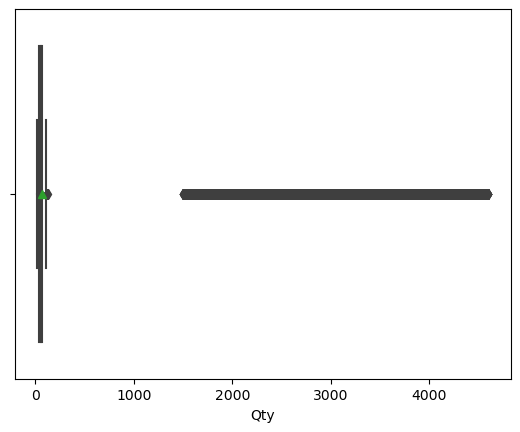

In [89]:
#Draw a boxplot to identify outliers in the Qty column of Work Details data set
sns.boxplot(x = "Qty", showmeans=True, data=WorkDetails_df)
plt.show()

In [90]:
#use interquartile range to remove outliers in the Qty column of Work Details data set
iqr_wd = WorkDetails_df['Qty'].quantile(0.75) - WorkDetails_df['Qty'].quantile(0.25)

lower_whisker_wd = WorkDetails_df['Qty'].quantile(0.25) - (1.5 * iqr_wd)
upper_whisker_wd = WorkDetails_df['Qty'].quantile(0.75) + (1.5 * iqr_wd)

WorkDetails_df = WorkDetails_df[WorkDetails_df['Qty'] > lower_whisker_wd]
WorkDetails_df = WorkDetails_df[WorkDetails_df['Qty'] < upper_whisker_wd]

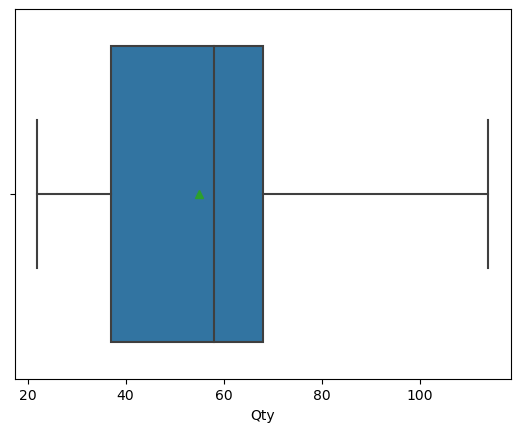

In [91]:
#Draw a boxplot to identify outliers in the Qty column of Work Details data set
sns.boxplot(x = "Qty", showmeans=True, data=WorkDetails_df)
plt.show()

In [92]:
WorkDetails_df

,Year,Month,Day,Estate,Division,EmpCode,Work,Workdayfraction,Qty,ExtraKilos
0,2012,6,20,EST,HO,41107,ABS,1.0,22.000000,0.00000
1,2012,7,9,EST,HO,41309,PLK,1.0,22.000000,0.00000
2,2012,9,27,EST,HO,41309,PLK,1.0,22.000000,0.00000
3,2014,1,10,EST,HO,41309,PLK,1.0,22.000000,0.00000
4,2013,2,25,EST,HO,41309,PLK,1.5,22.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...
1048570,2012,6,29,EST,UD,6065353,XXX,1.0,67.046918,8.86335
1048571,2012,3,31,EST,UD,6065353,XXX,1.0,67.046918,8.86335
1048572,2015,8,13,EST,UD,6065353,XXX,1.0,67.046918,8.86335
1048573,2015,8,14,EST,UD,6065353,XXX,1.0,67.046918,8.86335


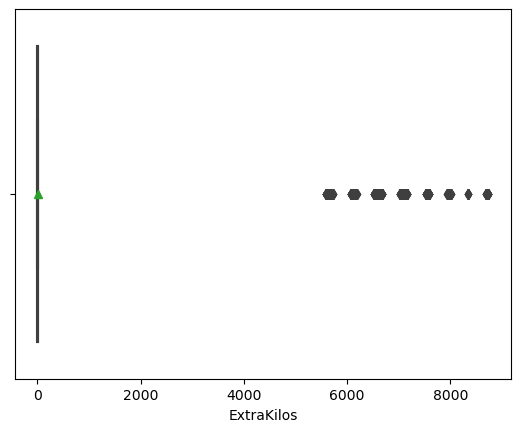

In [93]:
#Draw a boxplot to identify outliers in the Qty column of Work Details data set
sns.boxplot(x = "ExtraKilos", showmeans=True, data=WorkDetails_df)
plt.show()

In [94]:
#use interquartile range to remove outliers in the Qty column of Work Details data set
iqr_wd = WorkDetails_df['ExtraKilos'].quantile(0.75) - WorkDetails_df['ExtraKilos'].quantile(0.25)

lower_whisker_wd = WorkDetails_df['ExtraKilos'].quantile(0.25) - (1.5 * iqr_wd)
upper_whisker_wd = WorkDetails_df['ExtraKilos'].quantile(0.75) + (1.5 * iqr_wd)

WorkDetails_df = WorkDetails_df[WorkDetails_df['ExtraKilos'] > lower_whisker_wd]
WorkDetails_df = WorkDetails_df[WorkDetails_df['ExtraKilos'] < upper_whisker_wd]

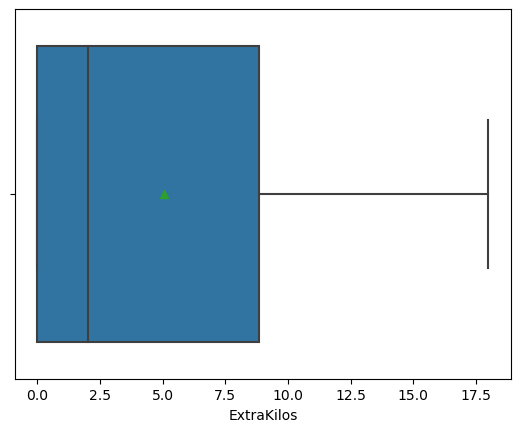

In [95]:
#Draw a boxplot to identify outliers in the Qty column of Work Details data set
sns.boxplot(x = "ExtraKilos", showmeans=True, data=WorkDetails_df)
plt.show()

In [96]:
#Sort the Work Details data set by EmpCode and then Year, Month, Day
WorkDetails_df = WorkDetails_df.sort_values(by=['ExtraKilos'])

#Replace NaN values in the Work Details data set with 0
WorkDetails_df = WorkDetails_df.fillna(0)
WorkDetails_df

,Year,Month,Day,Estate,Division,EmpCode,Work,Workdayfraction,Qty,ExtraKilos
0,2012,6,20,EST,HO,41107,ABS,1.0,22.000000,0.0
523265,2012,5,14,EST,HO,121200,SAC,1.0,58.000000,0.0
523266,2012,1,27,EST,HO,121200,SAC,1.0,58.000000,0.0
523267,2013,6,13,EST,HO,121200,SAC,1.0,58.000000,0.0
523268,2014,3,12,EST,HO,121200,SAC,1.0,58.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
532420,2012,1,18,EST,MD,2020808,ABS,1.0,58.000000,18.0
532421,2012,6,6,EST,UD,6063131,ABS,1.0,58.000000,18.0
532422,2013,1,22,EST,UD,6065252,ABS,1.0,58.000000,18.0
532411,2013,5,15,EST,HO,1060500,ABS,1.0,58.000000,18.0


In [97]:
#Save the cleaned Work Details data set to a new CSV file
WorkDetails_df.to_csv(os.path.join(cleaned_data_sets_dir, 'WorkDetails_Cleaned.csv'), index=False)